In [4]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
    
from utils import *
from jax_utils import *

# All Lennard-Jones calculators
- ASE
- JAX-MD Pair

JAX-MD Neighbor List omitted. Initial neighbor list construction in warm-up still TODO.

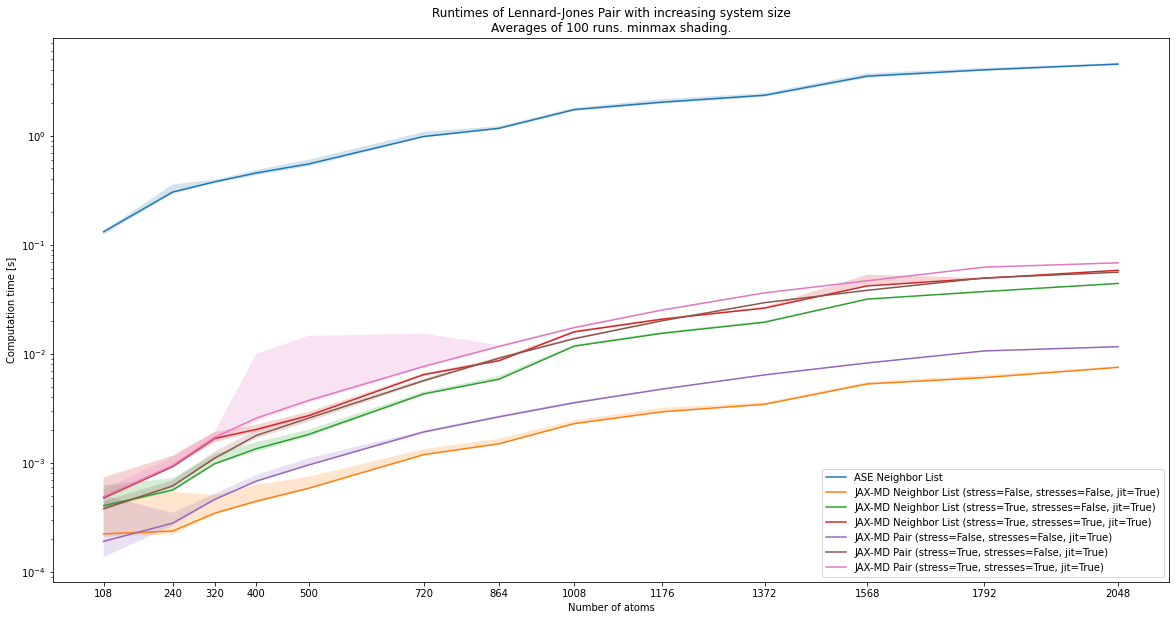

In [9]:
results = load_results_from_pickle("../results/100_runs/results_100_runs.pickle")

plot_runtimes(results=results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## Only slow calculators

i.e. ASE and JAX-MD with `jit=False`.

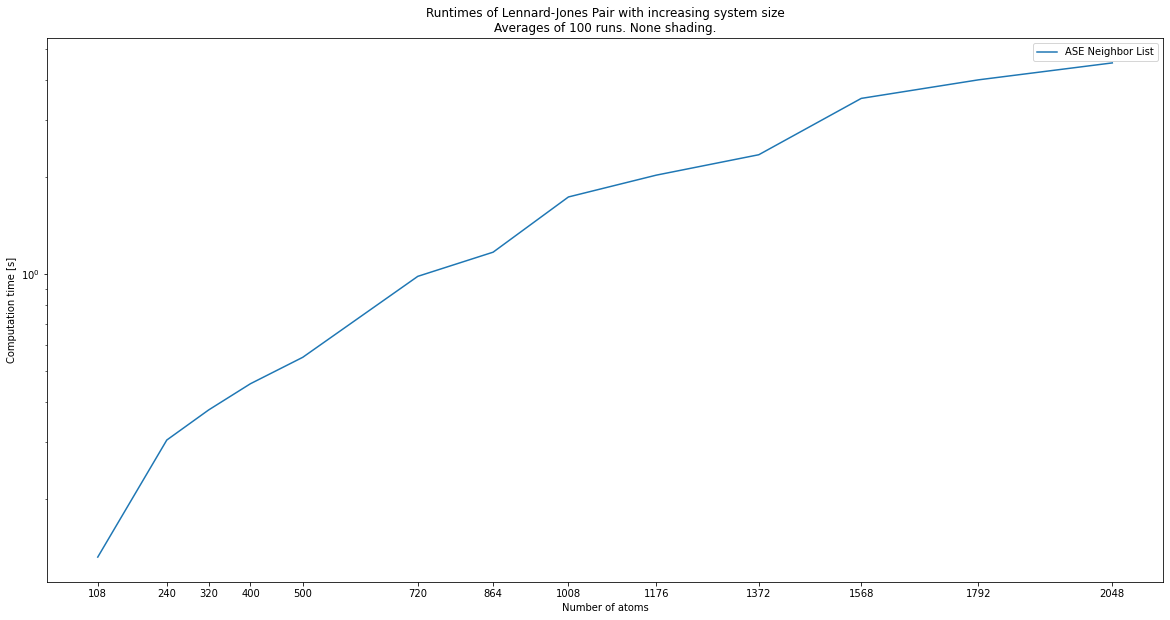

In [13]:
slow_results = list(filter(lambda r: "jit=True" not in r.calculator.description, results))

plot_runtimes(results=slow_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size')

# do this with more than 2048 atoms
# maybe without ASE intialization, smoother system size increase

# for same with neighbor lists, maybe initialize w/ FHI-Vibes

## Only fast calculators

i.e. JAX-MD with `jit=True`.

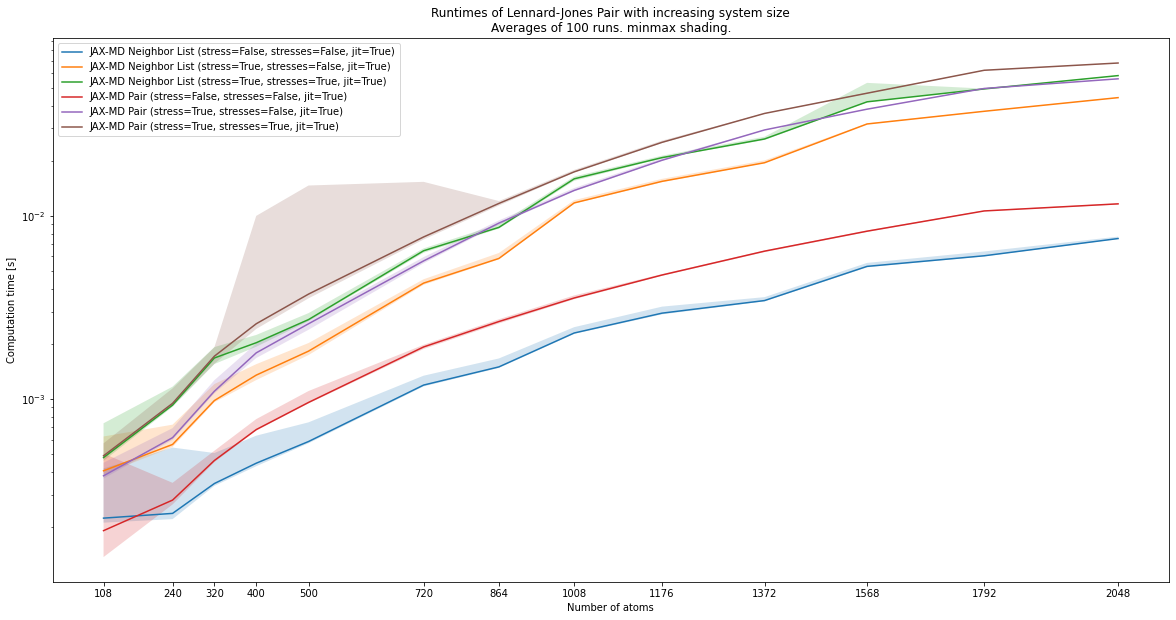

In [14]:
fast_results = list(filter(lambda r: "jit=False" not in r.calculator.description, results))
fast_results = list(filter(lambda r: "ASE" not in r.calculator.description, fast_results))

plot_runtimes(results=fast_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## `JAX-MD`: Pair vs. Neighbor Lists

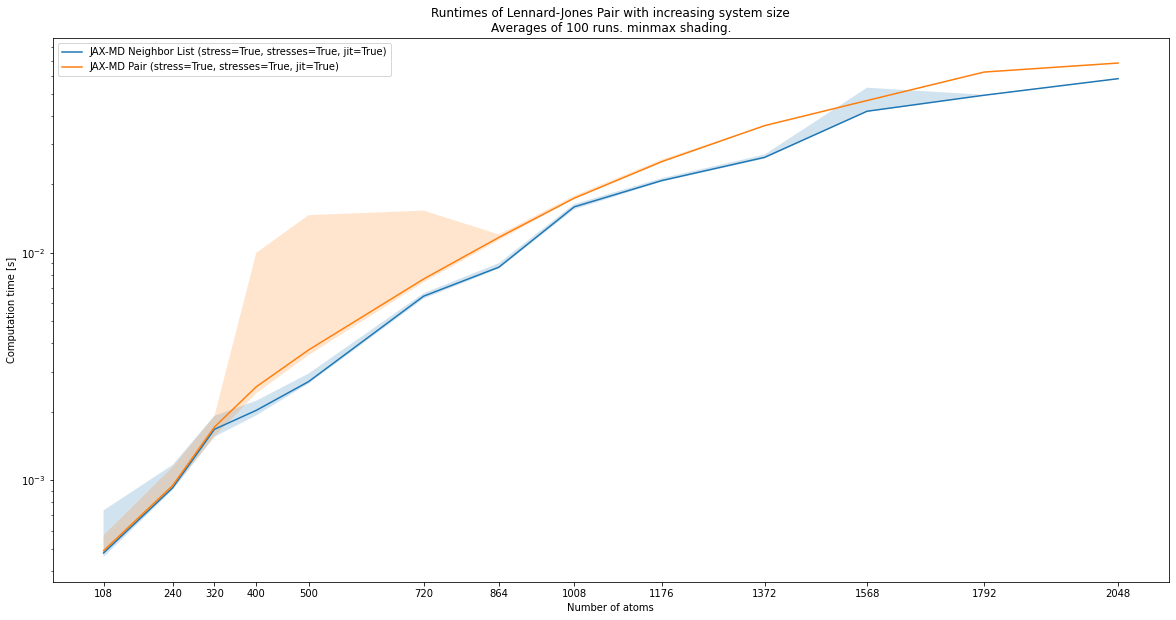

In [19]:
filtered_results = list(filter(lambda r: "jit=True" in r.calculator.description, results))
filtered_results = list(filter(lambda r: "stress=True" in r.calculator.description, filtered_results))
filtered_results = list(filter(lambda r: "stresses=True" in r.calculator.description, filtered_results))

plot_runtimes(results=filtered_results, 
              plot_title='Runtimes of Lennard-Jones Pair with increasing system size', 
              shade_by='minmax')

## Runtime per system size
(Same calculator as previous plot)

- For a single calculator: Per system size, plot the runtime over its indices.
- We perform the same computation repeatedly, so runtime should be pretty constant.
- Caching mechanisms would likely cause a consistent drop after initial computations.

### Pair

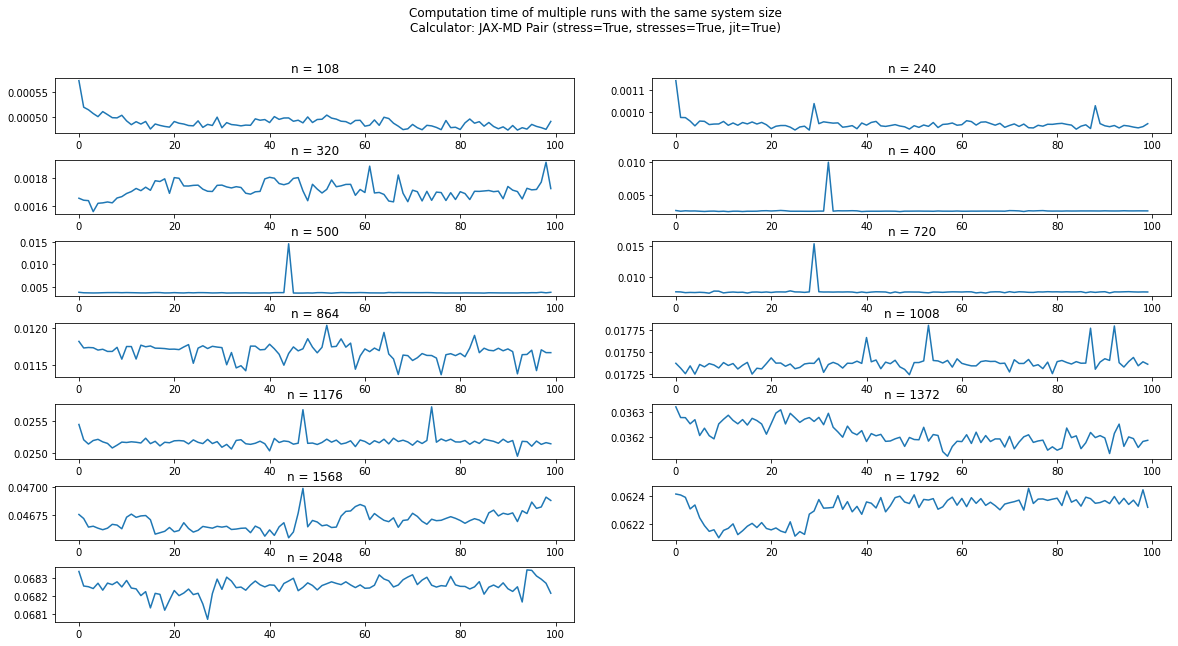

In [20]:
single_calculator = filter(lambda r: "JAX-MD Pair (stress=True, stresses=True, jit=True" in r.calculator.description, results)
plot_runtime_variances(list(single_calculator))

### Neighbor List

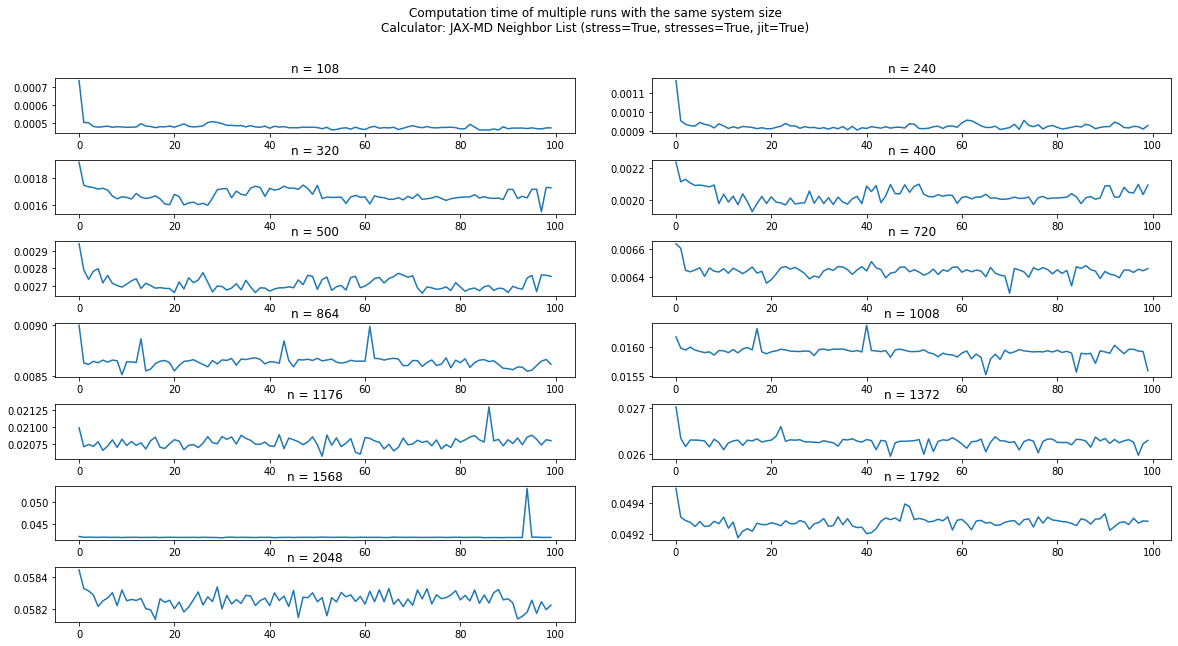

In [21]:
single_calculator = filter(lambda r: "JAX-MD Neighbor List (stress=True, stresses=True, jit=True" in r.calculator.description, results)
plot_runtime_variances(list(single_calculator))

# TODO
- Warm-up plots
- Single `JAX-MD` LJ calculator: How far can we go before we run into out-of-memory errors?
